In [1]:
import qiskit
from qiskit import  transpile, assemble, Aer, execute,QuantumCircuit
from qiskit.visualization import plot_bloch_multivector,plot_bloch_vector
from qiskit.visualization.bloch import Bloch


# o la la

Dirac notation
$|0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$
$|1\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$<br>
superpositions:
$|\psi\rangle = \alpha \, |0\rangle + \beta \, |1\rangle, \, \alpha, \beta \in \mathbb{C}$<br>
$|\alpha|^2 + |\beta|^2 = 1$



$|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ \,
$|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$


$|\psi\rangle \in \mathbb{H}$ and $\langle \psi| \in \mathbb{H}^\dagger$



$||\cdot|| : \mathcal{H} \rightarrow \mathbb{R},$
$\psi \mapsto \sqrt{\langle \psi | \psi \rangle}.$
$H_{\text{sub}} \subset H$

$\lim_{n \to \infty} \phi_n = \phi \in \mathcal{H}$
$\langle \psi | \phi \rangle = 0$
$H\psi^\perp := \{\phi \in \mathcal{H} \,|\, \langle \psi | \phi \rangle = 0\}$
$ \text{dim}(\mathbb{H})=n < \infty$

$\phi \in \mathbb{H}$
$\phi = \sum_{j \in I} a_j \phi_j$


$I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$
$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$
$Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}$
$Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$
$I^2 = X^2 = Y^2 = Z^2 = -iXYZ = I$<br>
$ZX =iY=-XZ$ (anti-commute)



A finite set of $\mathbb{R}$, $p_x$ such that $p_x \geq 0$ and $\sum_{x} p_x = 1$is a probability distribution



$H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$
$\text{S} = \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix}$


$\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}$
$\text{SWAP} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}$
$\text{CZ} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 \end{bmatrix}$
$\text{CS} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & i \end{bmatrix}$





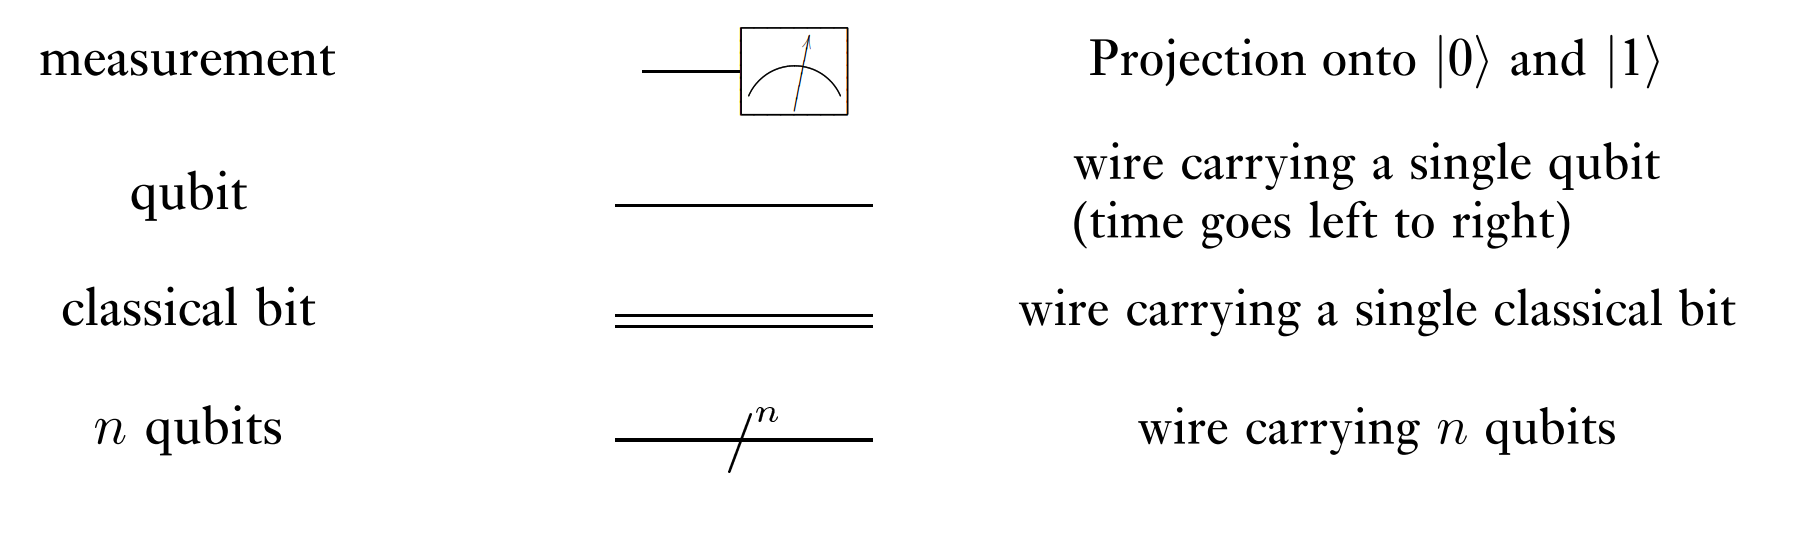

$|\psi\rangle = e^{i\alpha}\cos\left(\frac{\theta}{2}\right)|0\rangle+e^{i\beta}\sin\left(\frac{\theta}{2}\right)|1\rangle$


$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle \Rightarrow |\psi\rangle = r_\alpha e^{i\phi_\alpha}|0\rangle + r_\beta e^{i\phi_\beta}|1\rangle$

$|\psi'\rangle = e^{-i\phi_\alpha}|\psi\rangle = r_\alpha |0\rangle + r_\beta e^{i(\phi_\beta - \phi_\alpha)}|1\rangle$.











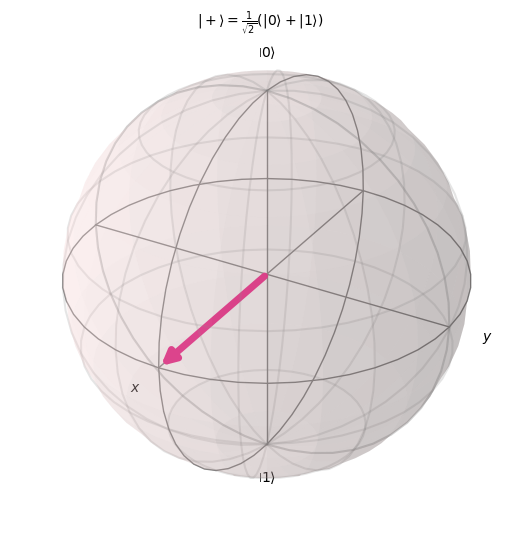

In [2]:
plot_bloch_vector([1,0,0], title=r'$|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$')

# quantum circuit implementing addition

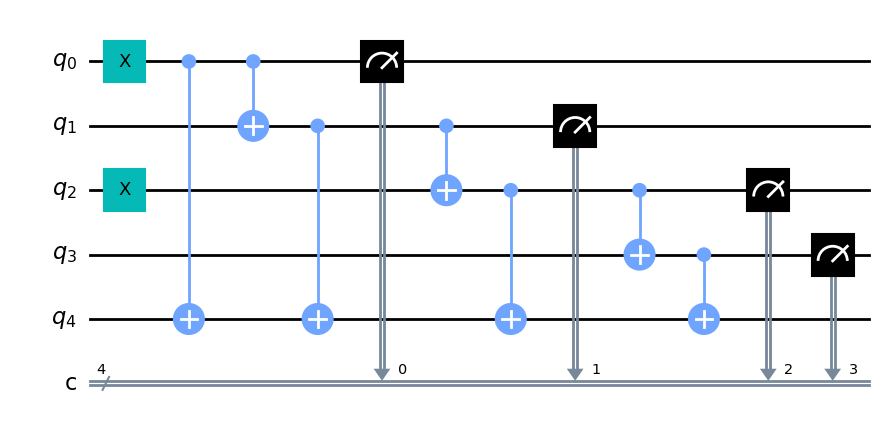

In [3]:
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

# Define the number of qubits needed to represent the numbers
n_qubits = 4  # For example, to add two 4-bit numbers

# Create a Quantum Circuit with n_qubits plus one ancilla qubit for carry
qc = QuantumCircuit(n_qubits + 1, n_qubits)

# Apply X gates to set the input qubits to the desired values
qc.x([0, 2])  # For example, to add 1 (0001) and 3 (0011)

# Implement a simple ripple-carry adder
for i in range(n_qubits):
    qc.cx(i, n_qubits)
    if i < n_qubits - 1:
        qc.cx(i, i + 1)

# Measure the output qubits
qc.measure(range(n_qubits), range(n_qubits))

# Draw the circuit with a border
qc.draw(output='mpl',style="clifford")
# circuit_drawer(qc, style="mpl", plot_barriers=False, output="mpl", fold=-1, scale=0.6)


# Quantum teleportation


Total count for 0 and 1 are: {'011': 250, '010': 262, '000': 242, '001': 270}


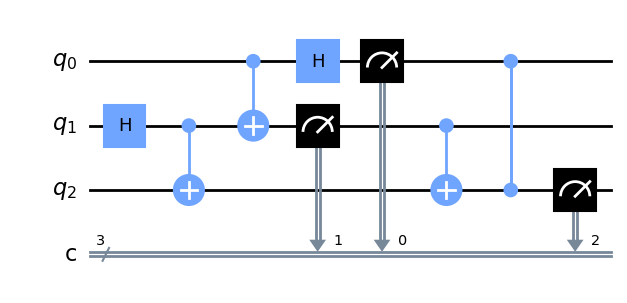

In [4]:
# Create a Quantum Circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Apply a Bell pair to qubits q1 and q2
qc.h(1)
qc.cx(1, 2)

# Alice prepares the qubit to be teleported
qc.cx(0, 1)
qc.h(0)

# Alice measures the qubits she owns
qc.measure(0, 0)
qc.measure(1, 1)

# Apply conditional operations based on the measurement results
qc.cx(1, 2)
qc.cz(0, 2)

# Measure the qubit q2 and store the result in the classical bit c2
qc.measure(2, 2)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1024).result()

# Plot the result
counts = result.get_counts(qc)
print("\nTotal count for 0 and 1 are:",counts)

qc.draw(output='mpl',style="clifford")

#  Quantum Fourier Transform (QFT) 

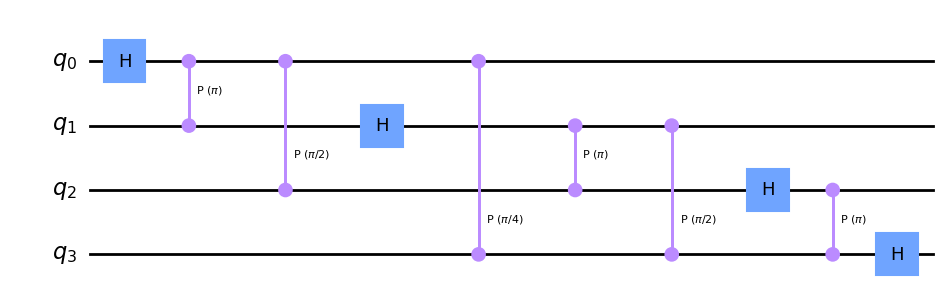

In [5]:
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer
import numpy as np

# Define the number of qubits
n_qubits = 4

# Create a Quantum Circuit
qc = QuantumCircuit(n_qubits)

# Apply the Quantum Fourier Transform
for i in range(n_qubits):
    qc.h(i)
    for j in range(i+1, n_qubits):
        qc.cp(2 * np.pi / (2 ** (j - i)), j, i)

# Draw the circuit
qc.draw(output='mpl',style="clifford")

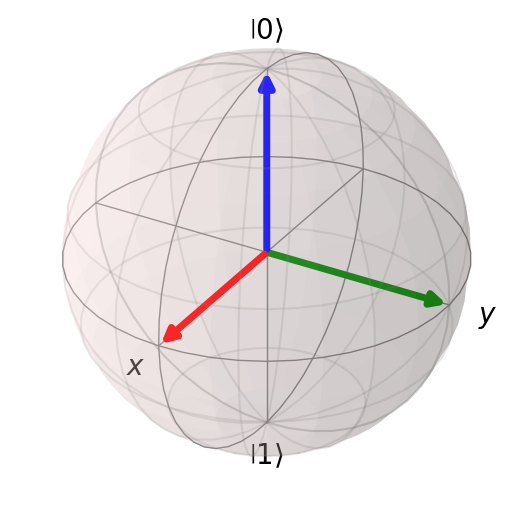

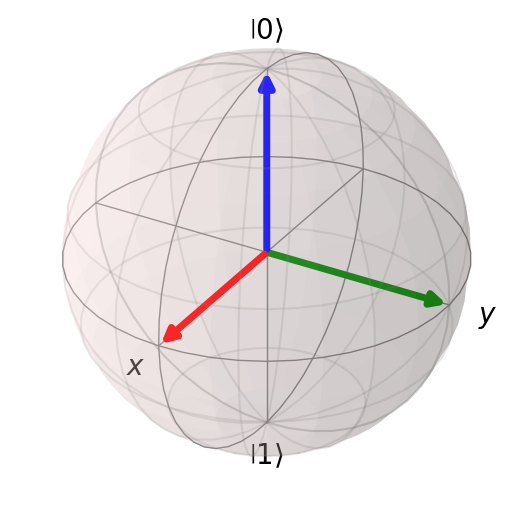

In [6]:
_bloch = Bloch()
_bloch.vector_color = ['red', 'green', 'blue']

sv = []
sv.append([1,0,0])
sv.append([0,1,0])
sv.append([0,0,1])

_bloch.add_vectors(sv)
_bloch.render()
_bloch.fig

$\langle a\psi | \phi \rangle = \bar{a} \langle \psi | \phi \rangle$


$\|\psi\| : \mathcal{H} \rightarrow \mathbb{C}$
$\phi \mapsto \|\psi| \phi \|\,$



$\langle \psi | : \mathbb{H} \rightarrow \mathbb{C}$
$\phi \mapsto \langle \psi | \phi \rangle$



$\delta_{jk} = \begin{cases} 0 & \text{if } j \neq k \\ 1 & \text{if } j = k \end{cases}$


$ | \cdot \rangle$


$\langle \cdot |$

$\mathbb{H}^* := \{ f : \mathcal{H} \rightarrow \mathbb{C} \,|\,  \text{ } \}$


$\mathbb{H}^*$


$\{|e_j\rangle\}_{j=0}^{n-1} \subset \mathbb{H}$


$
\langle\phi, \psi\rangle = (|\phi \rangle, |\psi \rangle) =: \langle \phi |(|\psi\rangle) = \langle \bar{\phi} | \, \bigl(|\psi \rangle \bigr) = \langle \phi \mid \psi \rangle
$

$\langle \phi | \, \bigl(|\psi \rangle \bigr)  = \langle \phi \mid \psi \rangle$

$|e_0\rangle = \begin{pmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{pmatrix}, \ldots, |e_n\rangle = \begin{pmatrix} 0 \\ \vdots \\ 0 \\ 1 \end{pmatrix}$



$$
C S^\dagger q_0, q_1 = I \otimes |0\rangle\langle0| + S^\dagger \otimes |1\rangle\langle1| = 
\left(
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -i
\end{array}
\right)
$$
​


$$\begin{equation}
CSWAP_{q_0,q_1,q_2} = I \otimes I \otimes |0\rangle\langle0| + SWAP \otimes |1\rangle\langle1| = 
\left(
\begin{array}{cccccccc}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{array}
\right)
\end{equation}$$